In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
# fetching data
Titanicsurvivaldata=pd.read_csv('C:/Users/USER/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Anaconda3 (64-bit)/New folder/Titanic.csv',encoding='latin1')

In [4]:
Titanicsurvivaldata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
 # observing data sets
 # removing junkfiles
removedcolumns=['PassengerId','Name','Ticket','Cabin']
Titanicsurvivaldata1=Titanicsurvivaldata.drop(removedcolumns,axis=1)
Titanicsurvivaldata1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
# data sets info 
# missing values
# "Age" has a lot missing values
#'Embarked' has 2 missing values
Titanicsurvivaldata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [7]:
TargetVariable='Survived'
Predictors=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']

In [8]:
Titanicsurvivaldata1.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

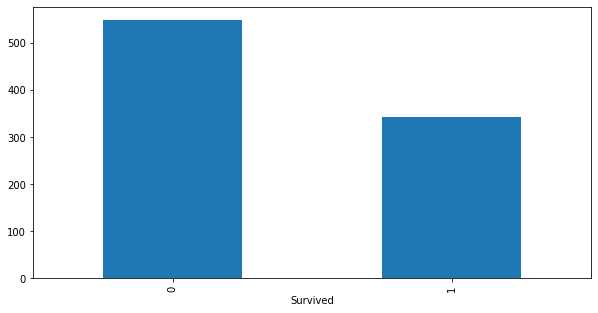

In [9]:
# visual diagram of target variable
# target variable is chategorical data 
# barplot is needed
%matplotlib inline
Titanicsurvivaldata1.groupby('Survived').size().plot(kind='bar',figsize=(10,5))

In [10]:
# understanding predictors
# "Age" and "Fare" are numerical continuos data 
# others are chategorical data
Titanicsurvivaldata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020089BE0C88>,
      dtype=object)

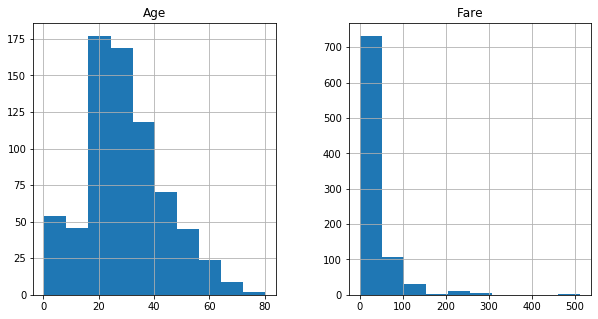

In [11]:
# Visual Diagram of Continuous Data type(numerical)

Titanicsurvivaldata1.hist(['Age','Fare'],figsize=(10,5))

In [12]:
#Visual Diagram of Chategorical Datatypes
def barplotcharts(inpdata,clt):
    %matplotlib inline   
    import matplotlib.pyplot as plt
    fig, subplot=plt.subplots(nrows=1,ncols=len(clt),figsize=(10,5))
    fig.suptitle('charts of chategorical data')
    for ColName, PlotNumber in zip(clt,range(len(clt))):
        inpdata.groupby(ColName).size().plot(kind='bar',ax=subplot[PlotNumber]) 
                                            
                                        

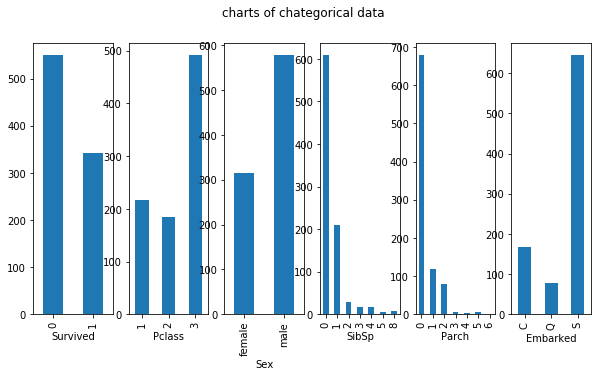

In [13]:
barplotcharts(inpdata=Titanicsurvivaldata1,clt=['Survived','Pclass', 'Sex', 'SibSp', 'Parch','Embarked'])
       

In [14]:
#Visual exploration of relationship between variables
#Continuous Vs Continuous ---- Scatter Plot
#Categorical Vs Continuous---- Bar Plot, Box Plot
#Categorical Vs Categorical---- Bar Plot

C:\Users\USER\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


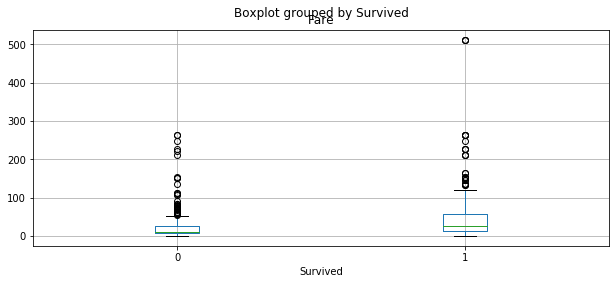

In [15]:
# Box plot for Categorical Variable Survived Vs Continuous Variable Fare
# Observe the outlier in Fare for Survived=1
Titanicsurvivaldata1.boxplot(column='Fare', by='Survived', figsize=(10,4), vert=True)

In [16]:
Titanicsurvivaldata1['Fare'][Titanicsurvivaldata1['Fare']>280]=280

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


C:\Users\USER\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


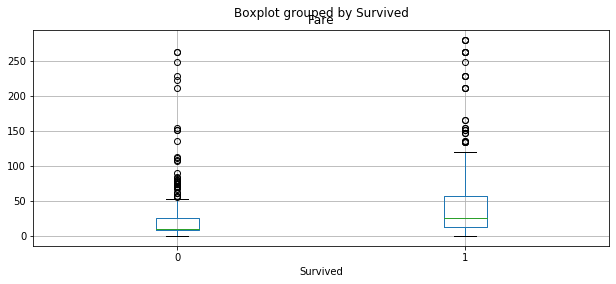

In [17]:
Titanicsurvivaldata1.boxplot(column='Fare', by='Survived', figsize=(10,4), vert=True)

C:\Users\USER\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


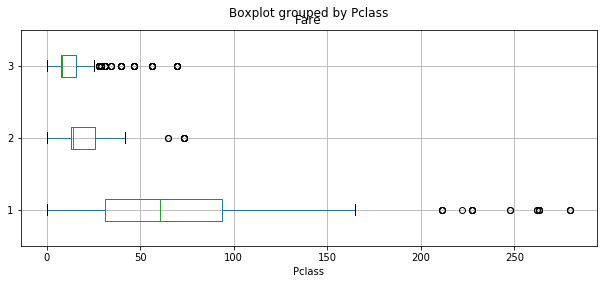

In [18]:
# As the outlier is on the higher side
# We observe what kind of fares have been paid by people travelling in Passenger Pclass=1
# This gives an idea about what is a typical high Fare paid by people
# We replace the Fare of outlier rows with this typical fare value of Class=1
# In this case it seems like Fare=263
Titanicsurvivaldata1.boxplot(column='Fare', by='Pclass', figsize=(10,4), vert=False)

In [20]:
from scipy.stats import f_oneway

# Running the one-way anova test between Fare and Survived
# Assumption(H0) is that Fare and Survived are correlated with each other
Survived_0=Titanicsurvivaldata1['Fare'][Titanicsurvivaldata1['Survived']==0]
Survived_1=Titanicsurvivaldata1['Fare'][Titanicsurvivaldata1['Survived']==1]

# Performing the ANOVA test
AnovaResults = f_oneway(Survived_0, Survived_1)

# Extreme example when all values are same and the variables are not correlated
#AnovaResults = f_oneway( [10,20], [10,20], [10,20] )

# Extreme example when all the values are different and both variables has correlation
#AnovaResults = f_oneway( [400,500], [7,10], [0.006,0.00001] )

print('P-Value for Anova is: ', AnovaResults[1])


P-Value for Anova is:  1.9966003874831432e-16


In [21]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=Titanicsurvivaldata1['Sex'], columns=Titanicsurvivaldata1['Survived'])
CrossTabResult

Survived,0,1
Sex,,
female,81,233
male,468,109


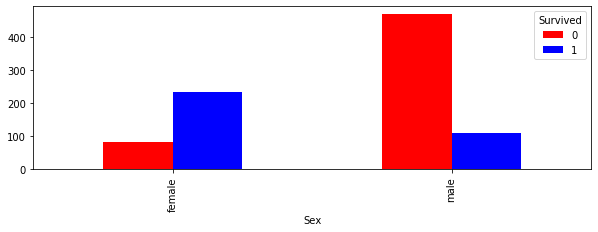

In [22]:
# Visual Inference using Grouped Bar chart

CrossTabResult.plot.bar(figsize=(10,3), color=['red','blue'])

In [23]:
from scipy.stats import chi2_contingency

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrossTabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 1.1973570627755645e-58


In [24]:
import os 
os.getcwd()

'C:\\Users\\USER\\Titanic Survival Prediction'

In [28]:
##########PreProcessing#######

#___________________________________________

In [29]:
# checking missing value
Titanicsurvivaldata1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [30]:
medianage=Titanicsurvivaldata1['Age'].median()

In [31]:
Titanicsurvivaldata1['Age'].fillna(medianage,inplace=True)

In [32]:
Titanicsurvivaldata1.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [33]:
modeEmbarked=Titanicsurvivaldata1['Embarked'].mode()[0]

In [34]:
Titanicsurvivaldata1['Embarked'].fillna(modeEmbarked,inplace=True)

In [35]:
Titanicsurvivaldata1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [37]:
Titanicsurvivaldata1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [38]:
Titanicsurvivaldata1['Sex'].replace({'male':1, 'female':0}, inplace=True)
Titanicsurvivaldata1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [42]:
Titanicsurvival=pd.get_dummies(Titanicsurvivaldata1)

In [43]:
Titanicsurvival.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [44]:
import pickle
import os

In [63]:
with open('Titanicsurvival.pkl','wb')as filewritestream:
    pickle.dump(Titanicsurvival,filewritestream)

    
    
with open('Titanicsurvival.pkl','rb')as filereadstream:
    Titanicsurvivalfrompkl=pickle.load(filereadstream)
    filereadstream.close()
    Titanicsurvivalfrompkl.head()
                                

        
            
       
    
    
   
    


            
            
     
    
                
                
        
   
    
